In [1]:
#Run the measureGlomeruli script to store centroids and volumes of all glomeruli from a
#3D labeled mask.

from measureGlomeruli import *

os.chdir('E:\AAV para enfermedades renales\LSFM combined images\GlomerulusSegmentation')

measureGlomeruli('MacroSPIM2\KidneyR2Left_LectinRed_LRSamples2021_LabelledGlom.tif',\
    'MacroSPIM2',startingSlice=3)



In [1]:
#Run connectcomponents function

from connectComponents import *

connectComponents('E:\Github repositories\LSFM-processing-data\Cysts segmentation\MacroSPIM2\CystsMask-KidneyR2Right_LectinRed_RLSamples2021_0.5_Lectine',\
                  'E:\Github repositories\LSFM-processing-data\connectComponentsResults\Cysts\MacroSPIM2-version2\CystsMask-KidneyR2Right_LectinRed_RLSamples2021_0.5_Lectine',\
                                50)




Slice 0 labeled
Slice 1 labeled
79 overlapped components
Slice 2 labeled
80 overlapped components
Slice 3 labeled
63 overlapped components
Slice 4 labeled
53 overlapped components
Slice 5 labeled
44 overlapped components
Slice 6 labeled
45 overlapped components
Slice 7 labeled
39 overlapped components
Slice 8 labeled
39 overlapped components
Slice 9 labeled
36 overlapped components
Slice 10 labeled
40 overlapped components
Slice 11 labeled
39 overlapped components
Slice 12 labeled
38 overlapped components
Slice 13 labeled
35 overlapped components
Slice 14 labeled
36 overlapped components
Slice 15 labeled
35 overlapped components
Slice 16 labeled
39 overlapped components
Slice 17 labeled
38 overlapped components
Slice 18 labeled
40 overlapped components
Slice 19 labeled
39 overlapped components
Slice 20 labeled
37 overlapped components
Slice 21 labeled
39 overlapped components
Slice 22 labeled
41 overlapped components
Slice 23 labeled
40 overlapped components
Slice 24 labeled
48 overlap

In [1]:
#Extract data from glomeruli:

from measureConComps import *

measureConComps('E:\AAV para enfermedades renales\LSFM combined images\GlomerulusSegmentation\MacroSPIM2\KidneyR2Left_LectinRed_LRSamples2021_LabelledGlom.tif',\
                'E:\AAV para enfermedades renales\LSFM combined images\GlomerulusSegmentation\MacroSPIM2',\
                startingSlice=3,dimension='3D',typeOfMask='glomeruli',saveSlices = False)




       Unnamed: 0  label   centroid-0   centroid-1   centroid-2     area
0               0      1     3.968267  1510.180087   912.378025   2521.0
1               1      2     5.987380  1877.713276   861.609288   3962.0
2               2      3     8.000000  2185.344000  1280.456000   2250.0
3               3      4     9.500000  1775.714286   793.897143   1750.0
4               4      5    12.735300  1811.852501   754.262375  15051.0
...           ...    ...          ...          ...          ...      ...
14237       14237  16795  2284.675846  1712.760818  1094.205350   5084.0
14238       14238  16796  2290.523232  1760.510374  1062.026008   6844.0
14239       14239  16797  2290.349807  1732.872008  1038.960425   5180.0
14240       14240  16798  2297.264049  1725.572059  1169.737658   7029.0
14241       14241  16799  2296.062272  1894.218955  1058.068298   5476.0

[14242 rows x 6 columns]
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


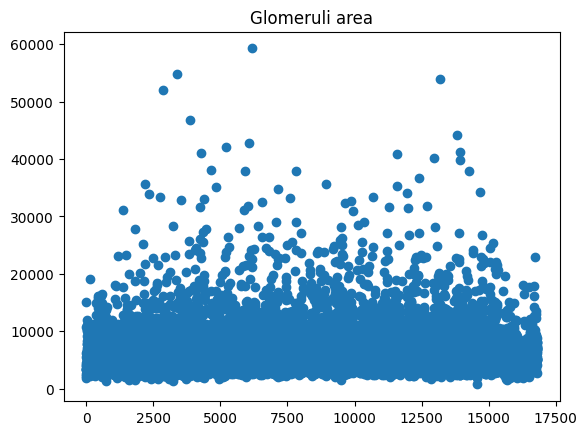

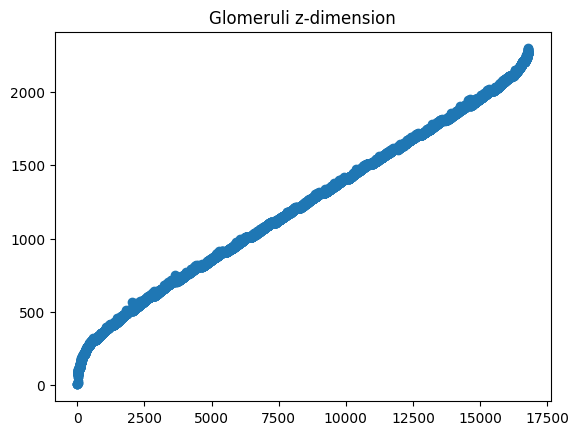

In [1]:
#Plot glomeruli data extracted with the "measureConComps" function

from Glomeruli.analyzeGlomeruliData import *

analyzeGlomeruliData('E:\AAV para enfermedades renales\LSFM combined images\GlomerulusSegmentation\MacroSPIM2\KidneyR2Left_LectinRed_LRSamples2021_LabelledGlom-imDims-2367-3800-2002.txt')

In [2]:
import numpy as np
a=np.ones([2367, 3800, 2002],dtype='uint8')


In [1]:
#Extract cortex interior 
from Glomeruli.obtainCortexInterior import *

os.chdir('E:\AAV para enfermedades renales\LSFM combined images')
obtainCortexInterior('E:\AAV para enfermedades renales\LSFM combined images\GlomerulusSegmentation\MacroSPIM2\KidneyR2Left_LectinRed_LRSamples2021_LabelledGlom-imDims-2367-3800-2002.txt',\
                    'E:\AAV para enfermedades renales\LSFM combined images\Full images\MacroSPIM2\KidneyR2Left_LectinRed_LRSamples2021_0.5_lectine',\
                    'E:\AAV para enfermedades renales\LSFM combined images\GlomerulusSegmentation\MacroSPIM2\KidneyR2Left_LectinRed_LRSamples2021_0.5_lectine-interiorCortex3',\
                    alpha=0,mode = '2D')

The image has 2367 slices
imShape: [2367 3800 2002]
Loading centroids to an array and rounding the z-coordinate


14242it [00:00, 15020.88it/s]


Creating the 2D alpha shapes for each slice


100%|██████████| 2367/2367 [21:15<00:00,  1.86it/s]

Elapsed time:  21.271900792916615  min


In [3]:
#Loop through all the glomeruli to extract their centroids and volumes (folder 1)

from measureConComps import *
from glob import glob
import os

inputFolder = 'E:\AAV para enfermedades renales\LSFM combined images\GlomerulusSegmentation'

#Iterate through all the subfolders in the input folder
for folder in glob(inputFolder+'\*'):
    folderName = os.path.basename(folder)

    #Iterate through all the kidneys in the subfolder
    for kidney in glob(folder+'\*.tif'):
        kidneyName = os.path.basename(kidney)

        print(f'Processing kidney {kidneyName} from {folderName}')
       
        #Extract centroids and volumes
        print('Extracting centroids and volumes...')
        measureConComps(kidney,folder,startingSlice=0,dimension='3D',typeOfMask='glomeruli',saveSlices = False)   

    

Processing kidney KidneyR2Left_LectinRed_LRSamples2021_LabelledGlom.tif from MacroSPIM2
Extracting centroids and volumes...
Elapsed time to load the image:  13.366678921381633  min


100%|██████████| 16799/16799 [00:00<00:00, 35292.45it/s]


Elapsed time to save all data in a txt:  0.7719557563463847  min
Elapsed time:  14.138634677728017  min
Processing kidney KidneyR2Right_LectinRed_RLSamples2021_LabelledGlom.tif from MacroSPIM2
Extracting centroids and volumes...
Elapsed time to load the image:  12.058906610806783  min


100%|██████████| 17011/17011 [00:00<00:00, 35298.06it/s]


Elapsed time to save all data in a txt:  0.6531407237052917  min
Elapsed time:  12.712047334512075  min
Processing kidney R1CLeft2021_LabelledGlom.tif from MacroSPIM2
Extracting centroids and volumes...
Elapsed time to load the image:  10.98032740354538  min


100%|██████████| 16340/16340 [00:00<00:00, 29812.08it/s]


Elapsed time to save all data in a txt:  0.5943332751592  min
Elapsed time:  11.574669396877288  min
Processing kidney R1CRight2021_LabelledGlom.tif from MacroSPIM2
Extracting centroids and volumes...
Elapsed time to load the image:  10.3029514670372  min


100%|██████████| 15842/15842 [00:00<00:00, 31549.79it/s]


Elapsed time to save all data in a txt:  0.5940156737963359  min
Elapsed time:  10.896967140833537  min
Processing kidney R2LEC-Path_LabelledGlom.tif from MacroSPIM3
Extracting centroids and volumes...
Elapsed time to load the image:  12.652467147509258  min


100%|██████████| 16330/16330 [00:00<00:00, 35052.52it/s]


Elapsed time to save all data in a txt:  0.8027294437090556  min
Elapsed time:  13.455213248729706  min
Processing kidney R6LEC_Path_LabelledGlom.tif from MacroSPIM3
Extracting centroids and volumes...
Elapsed time to load the image:  13.240857875347137  min


100%|██████████| 12766/12766 [00:00<00:00, 37548.57it/s]


Elapsed time to save all data in a txt:  0.8451510071754456  min
Elapsed time:  14.086008882522583  min


In [1]:
#Loop through all the glomeruli to obtain their centroids and volumes (folder 2)

from measureConComps import *
from glob import glob
import os

inputFolder = 'D:/0 - Thesis Data/Glomeruli segmentations'

#Iterate through all the subfolders in the input folder
for folder in glob(inputFolder+'\*'):
    folderName = os.path.basename(folder)

    #Iterate through all the kidneys in the subfolder
    for kidney in glob(folder+'\*.tif'):
        kidneyName = os.path.basename(kidney)

        print(f'Processing kidney {kidneyName} from {folderName}')
       
        #Extract centroids and volumes
        print('Extracting centroids and volumes...')
        measureConComps(kidney,folder,startingSlice=0,dimension='3D',typeOfMask='glomeruli',saveSlices = False)   

Processing kidney Kidney1_derecho_4.8x_1x3_R&Lshifted1.6mm_LabelledGlom.tif from MacroSPIM1
Extracting centroids and volumes...
Elapsed time to load the image:  5.473082033793132  min


100%|██████████| 18601/18601 [00:00<00:00, 34615.85it/s]


Elapsed time to save all data in a txt:  0.48651147286097207  min
Elapsed time:  5.9595935066541035  min
Processing kidney Kidney1_izq_4.8x_1x3_R&Lshifted1.6mm_LabelledGlom.tif from MacroSPIM1
Extracting centroids and volumes...
Elapsed time to load the image:  3.7406047185262046  min


100%|██████████| 16994/16994 [00:00<00:00, 31283.43it/s]


Elapsed time to save all data in a txt:  0.40484133958816526  min
Elapsed time:  4.14544605811437  min
Processing kidney R1Left_samplesNov2020_LabelledGlom.tif from MacroSPIM2
Extracting centroids and volumes...
Elapsed time to load the image:  6.827907025814056  min


100%|██████████| 19150/19150 [00:00<00:00, 32199.77it/s]


Elapsed time to save all data in a txt:  0.6009095311164856  min
Elapsed time:  7.428816556930542  min
Processing kidney R1Right_samplesNov2020_LabelledGlom.tif from MacroSPIM2
Extracting centroids and volumes...
Elapsed time to load the image:  5.1152484774589535  min


100%|██████████| 20564/20564 [00:00<00:00, 32517.10it/s]


Elapsed time to save all data in a txt:  0.6835967501004537  min
Elapsed time:  5.798845227559408  min
Processing kidney R2Left_samplesNov2020_LabelledGlom.tif from MacroSPIM2
Extracting centroids and volumes...
Elapsed time to load the image:  5.196132449309031  min


100%|██████████| 20226/20226 [00:00<00:00, 30696.95it/s]


Elapsed time to save all data in a txt:  0.5611692031224569  min
Elapsed time:  5.757301652431488  min
Processing kidney R2Right_samplesNov2020_LabelledGlom.tif from MacroSPIM2
Extracting centroids and volumes...
Elapsed time to load the image:  3.9912943959236147  min


100%|██████████| 19925/19925 [00:00<00:00, 35354.03it/s]


Elapsed time to save all data in a txt:  0.5601827303568522  min
Elapsed time:  4.551493767897288  min


In [4]:
#Connect glomeruli

from connectComponents import *

connectComponents('E:\AAV para enfermedades renales\LSFM combined images\GlomerulusSegmentation\MacroSPIM3\R5LEC-Path_InitialSegGlom',\
                  'E:\AAV para enfermedades renales\LSFM combined images\GlomerulusSegmentation\MacroSPIM3\R5LEC-Path_LabelledGlom')






The image has 2506 slices
Connecting components...


2505it [2:29:18,  3.58s/it]

Elapsed time:  149.3282177090645  min


In [5]:
#Extract the total volume of the cavity masks

from Kidneys_vessels.measureVolumeBinary import *
from glob import glob
import os

inputFolder = 'E:\Github repositories\LSFM-processing-data\Full kidney and vessels segmentation'

#Iterate through all the subfolders in the input folder
for folder in glob(inputFolder+'\*'):
    folderName = os.path.basename(folder)
    print(f'Processing folder {folderName}')


    #Get a list with all folders in the directory and another one with all files
    thingsInDir = glob(folder+'\*')

    #Take the folders with the cavity masks
    cavityMaskFolders = [thing for thing in thingsInDir if \
                           (os.path.isdir(thing) and 'vesselsMask' in os.path.basename(thing))]


    #Iterate through all the kidneys in the subfolder
    for i,mask in enumerate(cavityMaskFolders):

        if folderName == 'MacroSPIM2' and i==0 or i==1:
            continue

        maskName = os.path.basename(mask)

        print(f'Processing mask {maskName}')
       
        #Extract volumes
        print('Extracting volumes...')
        measureVolumeBinary(mask)   


Processing folder MacroSPIM1
Processing mask vesselsMask-Kidney1_derecho_4.8x_1x3_R_Lshifted1.6mm_0.5_Lectine_pygorpho_strRad_20
Extracting volumes...
Elapsed time to load the image:  3.493516127268473  min
Elapsed time calculate nonzero volume:  0.03612733284632365  min
Elapsed total time:  3.5296601176261904  min
Processing folder MacroSPIM2
Processing mask vesselsMask-R1CLeft2021_0.5_Lectine_pygorpho_strRad_20
Extracting volumes...
Elapsed time to load the image:  3.121795435746511  min
Elapsed time calculate nonzero volume:  0.05124945243199666  min
Elapsed total time:  3.173094876607259  min
Processing mask vesselsMask-R1CRight2021_0.5_Lectine_pygorpho_strRad_20
Extracting volumes...
Elapsed time to load the image:  4.571817155679067  min
Elapsed time calculate nonzero volume:  0.04564954439798991  min
Elapsed total time:  4.61747548977534  min
Processing mask vesselsMask-R1Left_samplesNov2020_0.5_Lectine_pygorpho_strRad_20
Extracting volumes...
Elapsed time to load the image:  3.